### Generalized Linear Models 
#### LinarRegression with OLS (Ordinary Least Squares)
Fits a linear model with coefficients w1,...,wp to minimize residual sum of squares between observed responses in the dataset, and the responses predicted by the linear approximation.

In [1]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

In [3]:
clf.fit([[0,0],[1,1],[2,2]],[0,1,2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
clf.coef_

array([ 0.5,  0.5])

The coefficients rely on the independence of the model terms. Otherwis the situation of multicolinearity can arise. 

In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

In [7]:
# load the datasets
diabetes = datasets.load_diabetes()

# use only one feature
diabetes_X = diabetes.data[:,np.newaxis, 2]

In [12]:
diabetes.data.shape # apparently 442 records, 10 features

(442, 10)

In [14]:
# split data into training and testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [15]:
# split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [16]:
# create a linear regression object
regr = linear_model.LinearRegression()

In [17]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# coefficients
print('Coefficients: \n', regr.coef_)
# the mean square error
print('Residual sum of squares: %.2f' % np.mean((regr.predict(diabetes_X_test)-diabetes_y_test) **2))

('Coefficients: \n', array([ 938.23786125]))
Residual sum of squares: 2548.07


In [20]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

Variance score: 0.47


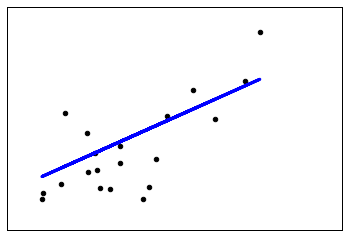

In [21]:
# plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

In [116]:
clf = linear_model.Ridge(alpha=.5)
clf.fit([[0,0],[0,0],[1,1]], [0,0.1,1])

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [117]:
clf.coef_

array([ 0.34545455,  0.34545455])

In [118]:
clf.intercept_

0.13636363636363638

In [119]:
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])

In [120]:
y = np.ones(10)

In [121]:
# compute paths
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

In [122]:
clf = linear_model.Ridge(fit_intercept=False)

In [123]:
coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

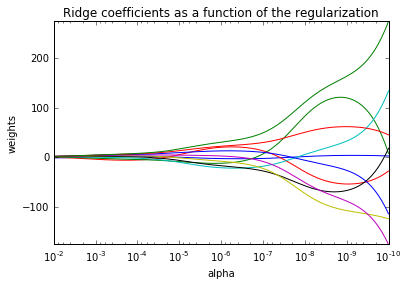

In [124]:
# display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent. For this reason, the Lasso and its variants are fundamental to the field of compressed sensing.

In [125]:
clf = linear_model.Lasso(alpha = 0.1)
clf.fit([[0,0],[1,1]],[0,1]) # so in our case, the target [0,1] should be a linear combination of the environment (input)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [127]:
clf.predict([1,1])

/Users/danielaremenska/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 0.8])

In [129]:
clf.predict([0,0])

/Users/danielaremenska/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 0.2])

As the Lasso regression yields sparse models, it can thus be used to perform feature selection, as detailed in L1-based feature selection.

### ElasticNet
ElasticNet is a linear regression model trained with L1 and L2 prior as regularizer. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of L1 and L2 using the l1_ratio parameter.

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

In [147]:
diabetes = datasets.load_diabetes()
X = diabetes.data
Y = diabetes.target

In [148]:
X /= X.std(axis=0) # standardize data (easier to set the l1_ratio parameter)

In [149]:
eps = 5e-3 # the smaller it is, the longer is on the path

In [150]:
print("Computing regularization path using the lasso....")
alphas_lasso, coefs_lasso, _ = linear_model.lasso_path(X, y, eps, fit_intercept=False)

Computing regularization path using the lasso....


In [151]:
print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = linear_model.lasso_path(X, y, eps, positive=True, fit_intercept=False)

Computing regularization path using the positive lasso...


In [153]:
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = linear_model.enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

print("Computing regularization path using the positve elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = linear_model.enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)


Computing regularization path using the elastic net...
Computing regularization path using the positve elastic net...


In [157]:
coefs_lasso.T.shape

(100, 10)

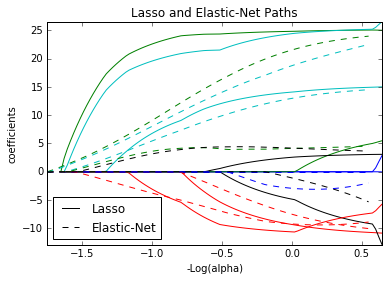

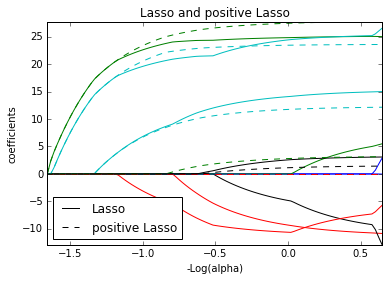

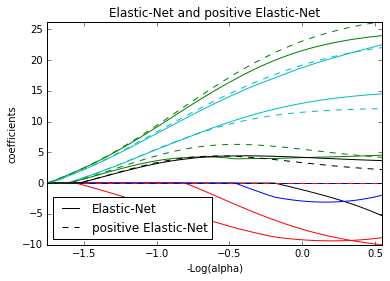

In [158]:
# Display results

plt.figure(1)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
l2 = plt.plot(-np.log10(alphas_enet), coefs_enet.T, linestyle='--')

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')


plt.figure(2)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
l2 = plt.plot(-np.log10(alphas_positive_lasso), coefs_positive_lasso.T,
              linestyle='--')

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
plt.axis('tight')


plt.figure(3)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_enet), coefs_enet.T)
l2 = plt.plot(-np.log10(alphas_positive_enet), coefs_positive_enet.T,
              linestyle='--')

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
           loc='lower left')
plt.axis('tight')
plt.show()

In [159]:
np.random.seed(42)